### Sin agua

Number of images detected: 9


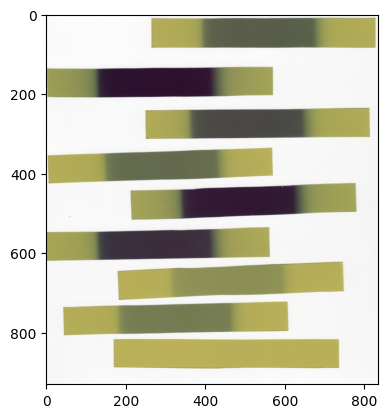

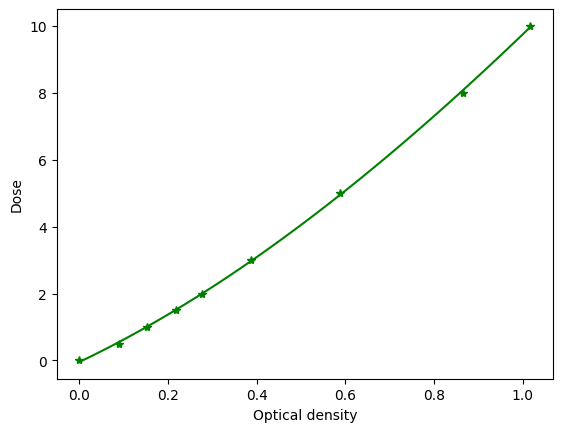

<Axes: xlabel='Optical density', ylabel='Dose'>

In [1]:
#from Dosepy.tools.image import load
from image import load
from pathlib import Path

imparted_doses = [0, 0.5, 1,1.5, 2, 3, 5, 8, 10]

#file_path = Path("/home/luis/Documents/GitHub/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif"  # Office PC
file_path_sin = Path("/home/luis/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif" # Personal laptop
cal_image_sin = load(file_path_sin, for_calib = True)
cal_sin = cal_image_sin.get_calibration(doses = imparted_doses, channel = "G", field_in_film = True)
cal_image_sin.plot()
cal_sin.plot(color = 'green')

### Con agua

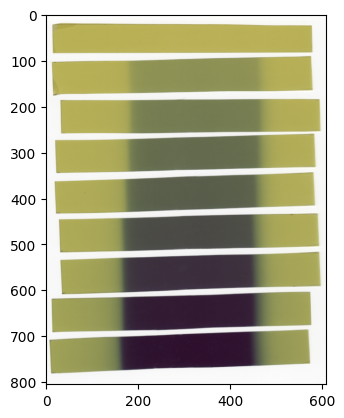

Number of images detected: 9


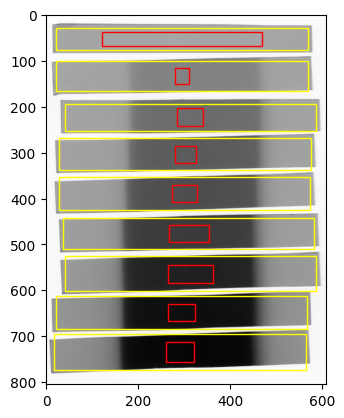

Number of images detected: 9


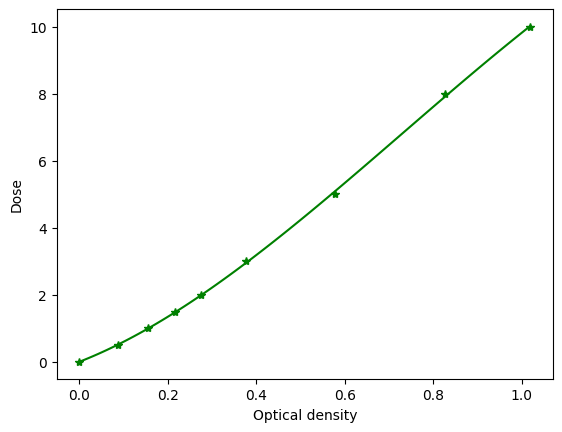

<Axes: xlabel='Optical density', ylabel='Dose'>

In [5]:
file_path_agua = Path("/home/luis/Descargas") / "agua.tif"
cal_image_agua = load(file_path_agua, for_calib = True)
cal_image_agua.plot()
cal_image_agua.get_stat(ch = 'G', field_in_film = True, ar = 0.4, show = True, threshold = 0.8)
cal_agua = cal_image_agua.get_calibration(doses = imparted_doses, channel = "G", field_in_film = True, threshold = 0.8)
cal_agua.plot(color = 'green')

## Dosis inferir (FAIL It is needed a reference film in the tif image)

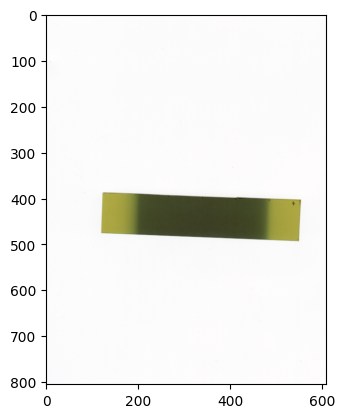

Number of images detected: 1


IndexError: list index out of range

In [9]:
inferir_path = Path("/home/luis/Descargas") / "dosis inferir.tif"
inferir_img = load(inferir_path)
inferir_img.plot()
dose_sin = inferir_img.to_dose(cal_sin)
dose_agua = inferir_img.to_dose(cal_agua)

## Threshold fail

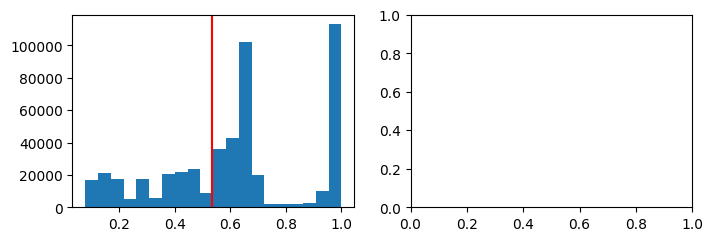

In [3]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

grayscale = rgb2gray(cal_image_agua.array)
plt.hist(grayscale.ravel())

thresh = threshold_otsu(grayscale)

fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].hist(grayscale.ravel(), bins = 20)
ax[0].axvline(thresh, color='r')